In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_json('data/data.zip')

In [3]:
data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [5]:
data[['acct_type', 'sale_duration']].head()

,acct_type,sale_duration
0,fraudster_event,29.0
1,premium,28.0
2,premium,54.0
3,premium,0.0
4,premium,63.0


In [6]:
data[['acct_type', 'has_header']].head()

,acct_type,has_header
0,fraudster_event,1.0
1,premium,0.0
2,premium,NaN
3,premium,0.0
4,premium,0.0


In [7]:
len(data['previous_payouts'][1])

49

In [8]:
data['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

In [9]:
data['Fraud'] = 0

In [10]:
data['Fraud'] = (data['acct_type'] == 'fraudster_event') | (data['acct_type'] == 'fraudster') | (data['acct_type'] == 'fraudster_att')

In [11]:
data['Fraud'].describe()

count     14337
unique        2
top       False
freq      13044
Name: Fraud, dtype: object

In [12]:
13044/14337

0.9098137685708307

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [14]:
data = data.drop(['approx_payout_date', 'body_length', 'gts', 'num_order', 'num_payouts', 'sale_duration2'], axis =1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 39 columns):
acct_type           14337 non-null object
channels            14337 non-null int64
country             14256 non-null object
currency            14337 non-null object
delivery_method     14321 non-null float64
description         14337 non-null object
email_domain        14337 non-null object
event_created       14337 non-null int64
event_end           14337 non-null int64
event_published     14238 non-null float64
event_start         14337 non-null int64
fb_published        14337 non-null int64
has_analytics       14337 non-null int64
has_header          8928 non-null float64
has_logo            14337 non-null int64
listed              14337 non-null object
name                14337 non-null object
name_length         14337 non-null int64
object_id           14337 non-null int64
org_desc            14337 non-null object
org_facebook        14278 non-null float64
org_name       

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = data['Fraud']
X = data.drop(['Fraud'], axis =1)

In [19]:
y

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
14307    False
14308    False
14309    False
14310    False
14311    False
14312    False
14313    False
14314    False
14315    False
14316     True
14317    False
14318     True
14319    False
14320    False
14321    False
14322    False
14323    False
14324    False
14325     True
14326    False
14327    False
14328    False
14329    False
14330    False
14331    False
14332     True
14333    False
14334    False
14335    False
14336     True
Name: Fraud, Length: 14337, dtype: bool

In [20]:
data.describe()

,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,has_analytics,has_header,has_logo,...,object_id,org_facebook,org_twitter,sale_duration,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,8928.000000,14337.000000,...,1.433700e+04,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,0.073028,0.202061,0.842087,...,4.531344e+06,7.974436,4.306976,46.869694,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,0.260191,0.401560,0.364672,...,1.987661e+06,11.761241,6.011520,54.825253,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,0.000000,0.000000,...,4.714600e+04,0.000000,0.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,0.000000,0.000000,1.000000,...,2.902989e+06,0.000000,0.000000,16.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,0.000000,0.000000,1.000000,...,4.580386e+06,0.000000,0.000000,32.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,0.000000,0.000000,1.000000,...,6.073577e+06,14.000000,11.000000,59.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,1.000000,1.000000,1.000000,...,8.792893e+06,91.000000,34.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [21]:
from seaborn import pairplot

In [22]:
data

,acct_type,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False
5,premium,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,1300064400,1.294422e+09,...,299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY,False
6,premium,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,1297477800,1.294425e+09,...,706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD,False
7,premium,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294427837,1296277200,1.294428e+09,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,False
8,premium,4,US,USD,0.0,"<p style=""text-align: center;""><font face=""boo...",credosf.com,1294428122,1297753200,1.294880e+09,...,0,1294428121,3,465 California Street,US,37.792847,-122.402082,,,False
9,premium,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294428286,1296882000,1.294428e+09,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,False


In [65]:
import john

In [66]:
john.rand_for(X, y)

TypeError: 'numpy.ndarray' object is not callable

In [67]:
X = data[['delivery_method', 'event_created', 'event_end', 'event_published', 'event_start', 'fb_published', 'has_analytics', 'has_header',	'has_logo', 'object_id', 'org_facebook', 'org_twitter', 'show_map', 'user_age', 'user_created', 'user_type', 'venue_latitude',	'venue_longitude']] 

In [68]:
X =X.fillna(0)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
y_train

12648    False
7291     False
11419    False
12832    False
12353    False
6354     False
10911    False
2931     False
13989    False
2250     False
5106     False
4323     False
5115      True
6790     False
7218     False
4614     False
9700     False
4151      True
5621     False
11216    False
2287     False
1060     False
10855    False
6533     False
177       True
6438     False
11611    False
13818    False
8877     False
4234     False
         ...  
248       True
9021     False
6941     False
10066    False
10132    False
5203      True
6794     False
1703     False
283      False
8743     False
9786     False
6157      True
4980     False
9098     False
3011     False
5063     False
11890    False
2308     False
6384     False
13731    False
9327     False
5637     False
10474    False
13177    False
13432    False
6516     False
2771      True
756      False
9822     False
6131     False
Name: Fraud, Length: 10752, dtype: bool

In [70]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
clf.predict(X_test)

array([False, False, False, ..., False, False, False])

In [34]:
X

,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,has_analytics,has_header,has_logo,object_id,org_facebook,org_twitter,sale_duration,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
0,5,0.0,1262739706,1265630400,1.263110e+09,1265594400,0,0,1.0,0,527017,0.0,0.0,29.0,1,36,1259613950,1,25.777471,-80.133433
1,0,1.0,1293832670,1296288000,1.293833e+09,1296255600,0,0,0.0,1,786878,0.0,12.0,28.0,0,149,1280942776,3,32.776566,-79.930922
2,8,1.0,1291090956,1295740800,1.291092e+09,1295713800,0,0,0.0,0,787337,0.0,0.0,54.0,0,214,1272559388,3,33.944201,-118.080419
3,6,1.0,1360681570,1388534400,1.360683e+09,1360702800,0,0,0.0,1,885645,0.0,0.0,0.0,0,889,1283870102,3,0.000000,0.000000
4,11,0.0,1291994666,1297468800,1.291995e+09,1297440000,1,0,0.0,0,1114349,0.0,0.0,63.0,0,35,1288984065,3,42.353848,-71.044276
5,6,0.0,1294421810,1300064400,1.294422e+09,1300053600,0,0,0.0,1,1179983,0.0,0.0,65.0,1,299,1268579110,1,38.209797,-84.558831
6,5,1.0,1294425018,1297477800,1.294425e+09,1297468800,0,0,1.0,1,1180179,0.0,0.0,35.0,1,706,1233437951,3,39.414270,-77.405089
7,12,0.0,1294427837,1296277200,1.294428e+09,1296271800,0,0,0.0,1,1180391,18.0,0.0,21.0,1,71,1288276103,3,35.580468,-82.563855
8,4,0.0,1294428122,1297753200,1.294880e+09,1297737000,1,0,0.0,1,1180423,0.0,0.0,33.0,0,0,1294428121,3,37.792847,-122.402082
9,12,0.0,1294428286,1296882000,1.294428e+09,1296876600,0,0,0.0,1,1180435,18.0,0.0,28.0,1,71,1288276103,3,35.580468,-82.563855


In [36]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Create RandomForestClassifier and train it
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([False, False, False, ..., False, False, False])

In [63]:
from sklearn.metrics import classification_report, recall_score


In [72]:
print (classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

      False       0.95      0.99      0.97      3250
       True       0.88      0.52      0.65       335

avg / total       0.95      0.95      0.94      3585



In [64]:
print (recall_score(y_test, clf.predict(X_test)))

0.2814569536423841


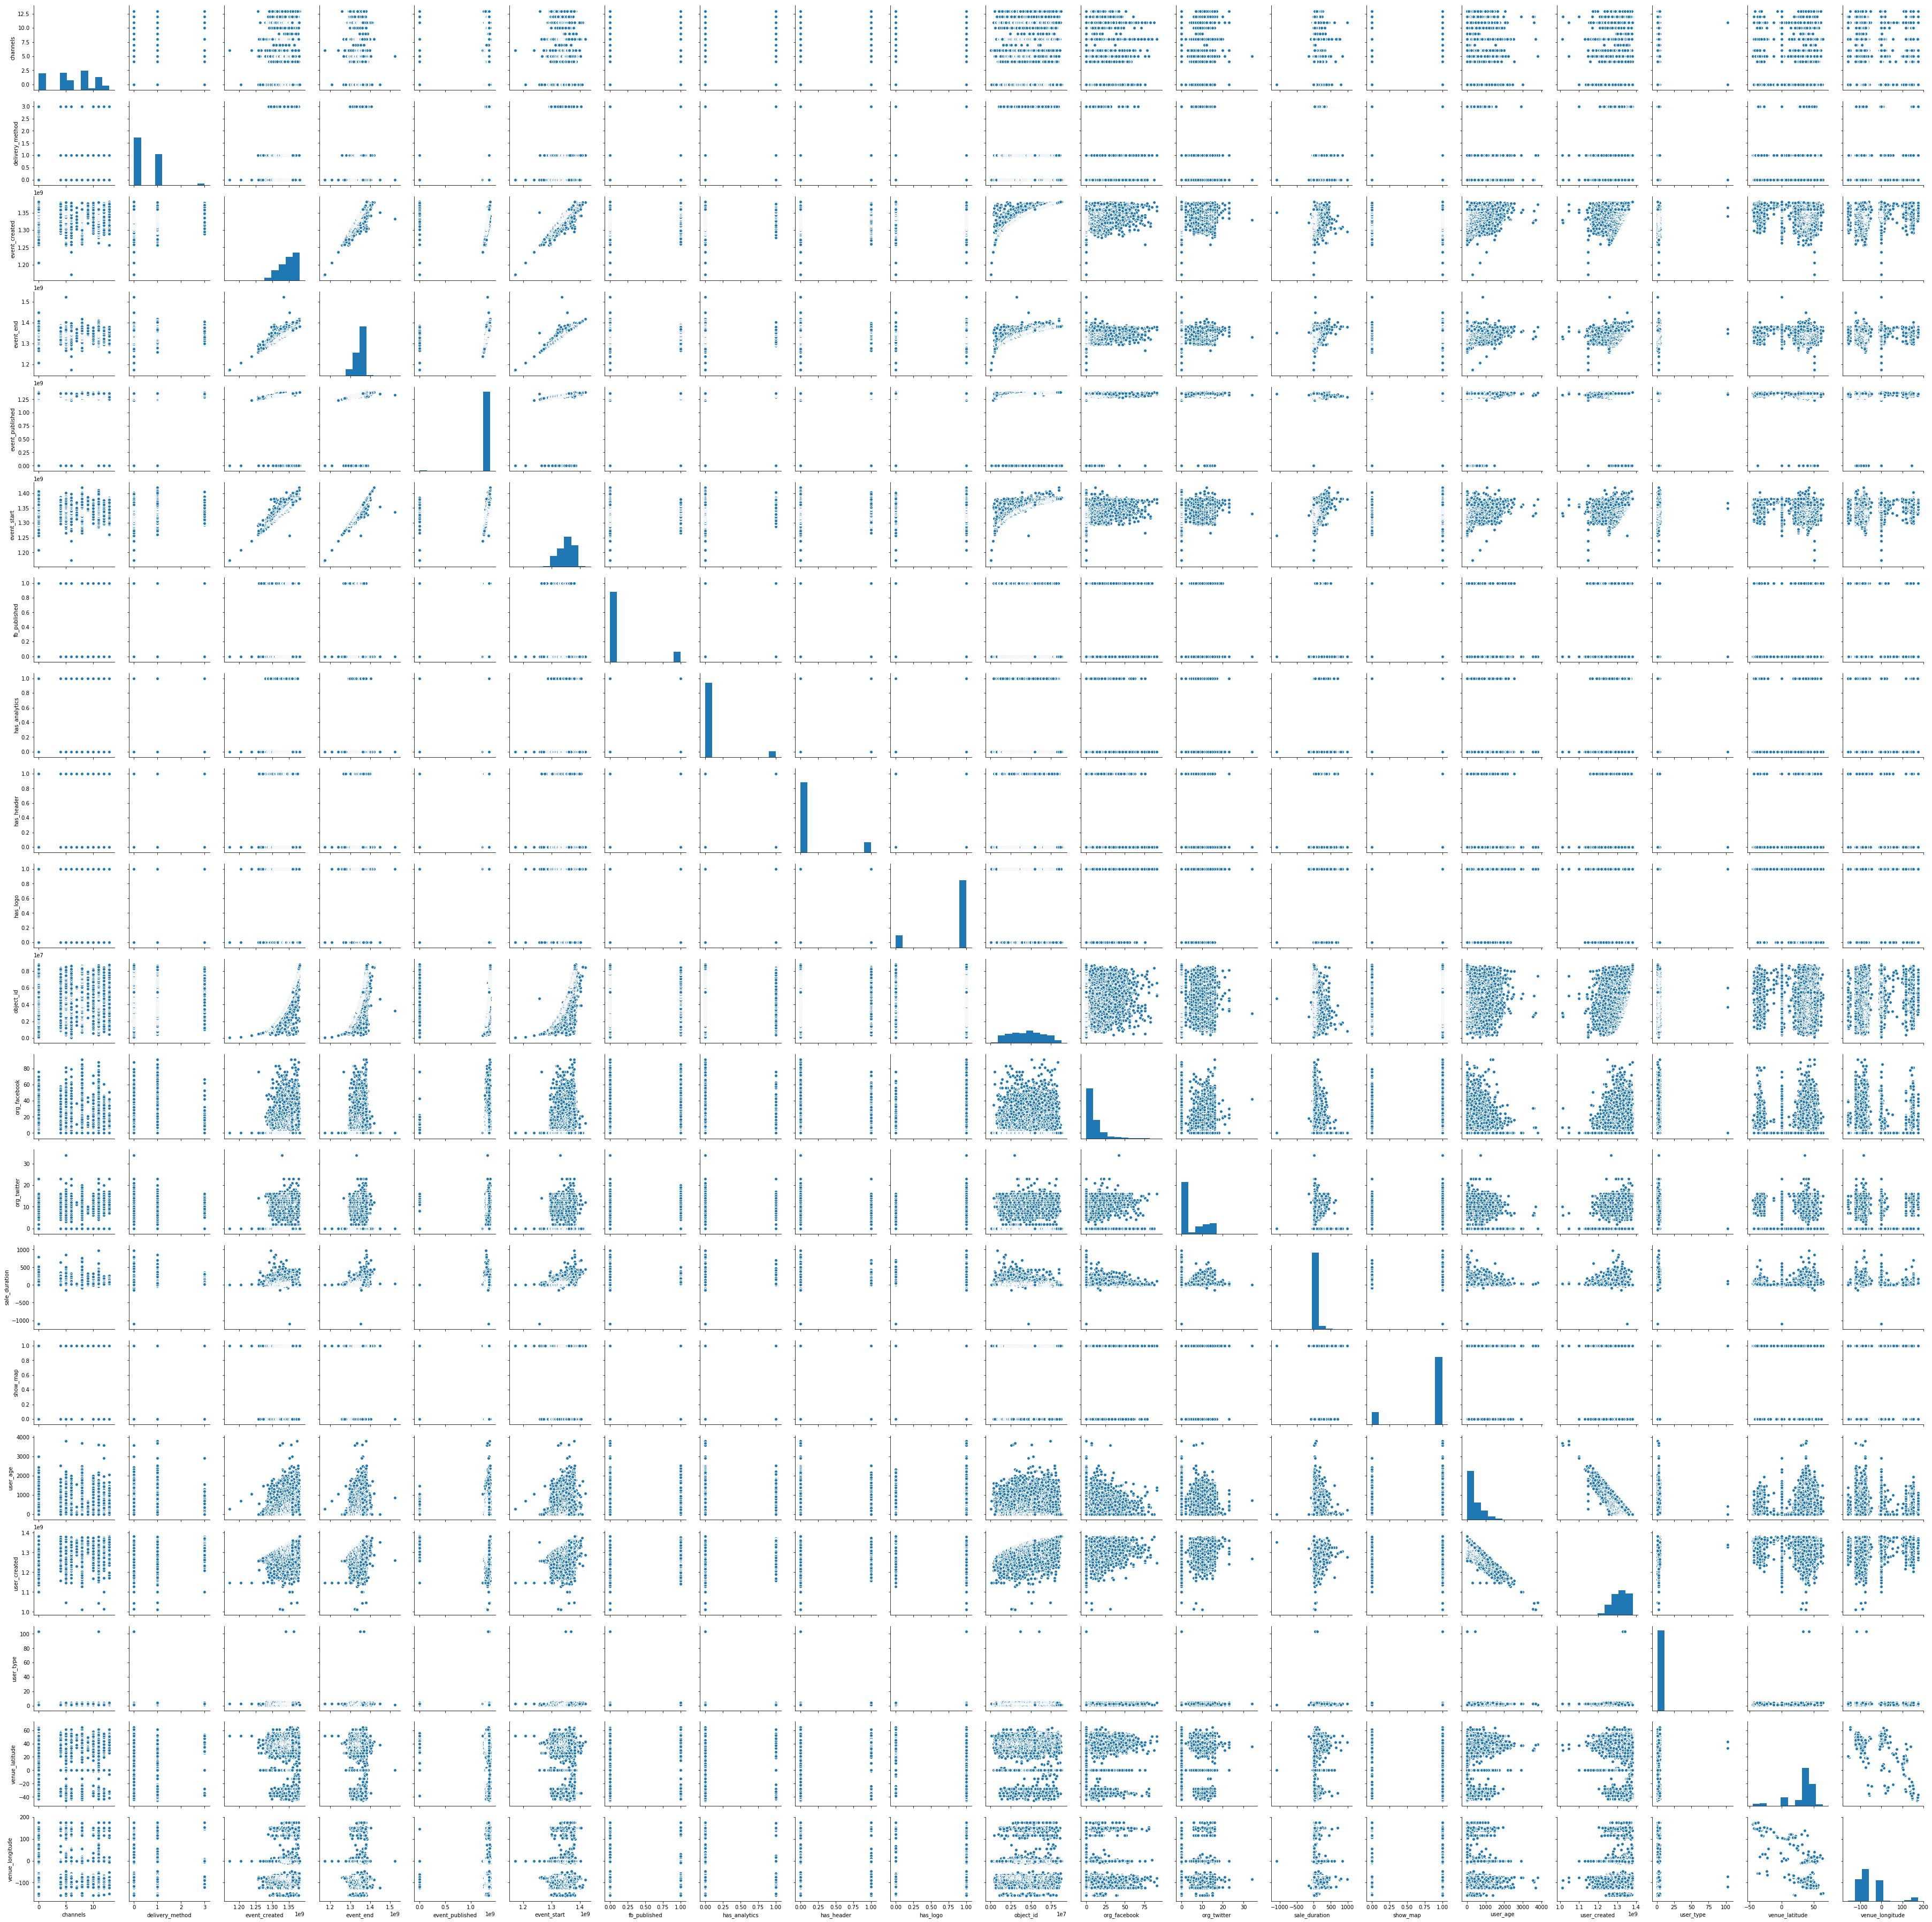

In [47]:
pairplot(X)

In [53]:
X2 = X[['channels', 'delivery_method', 'event_created', 'event_end', 'event_published', 'event_start', 'fb_published']]
X3 = X[['has_analytics', 'has_header', 'has_logo', 'object_id', 'org_facebook', 'org_twitter', 'sale_duration']]
X4 = X[['show_map', 'user_age', 'user_created', 'user_type', 'venue_latitude', 'venue_longitude']]

X2['Fraud'] = y
X3['Fraud'] = y
X4['Fraud'] = y

/Users/johnhayes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/johnhayes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnhayes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

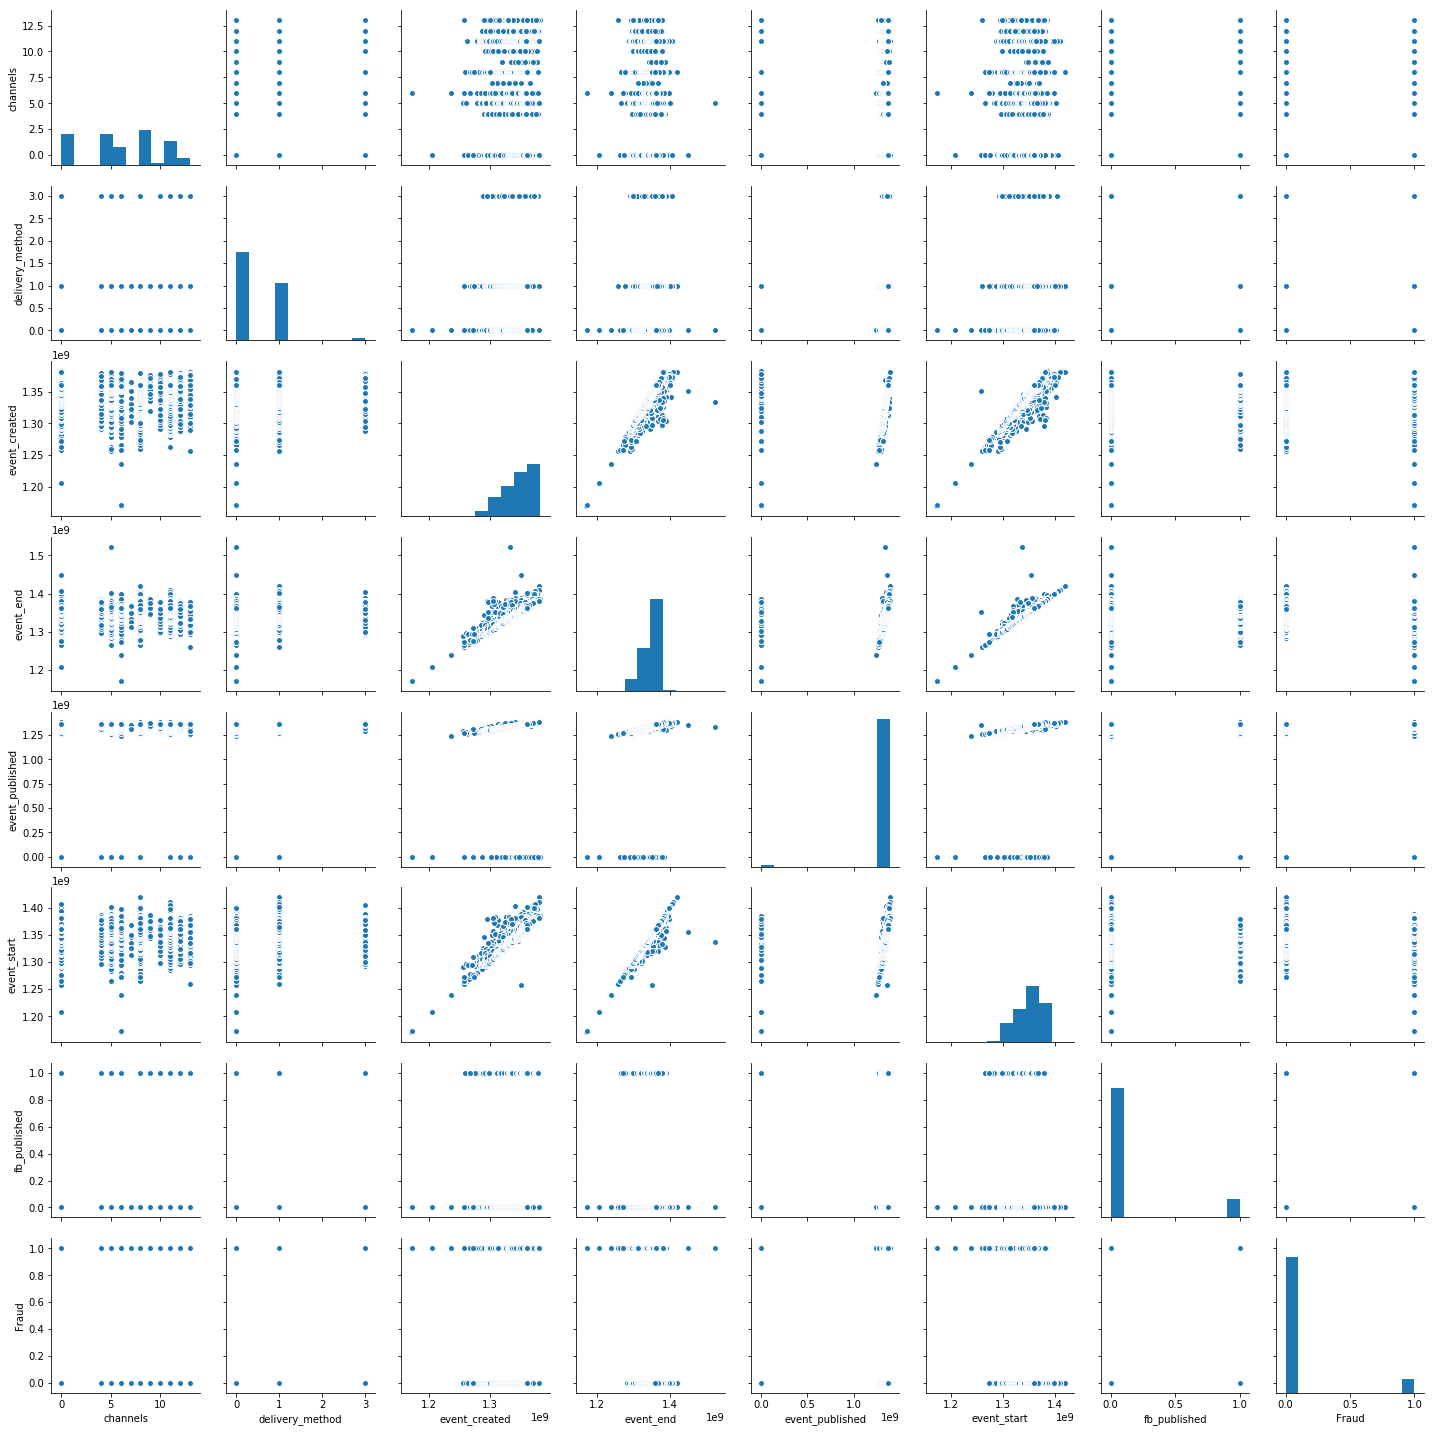

In [54]:
pairplot(X2)

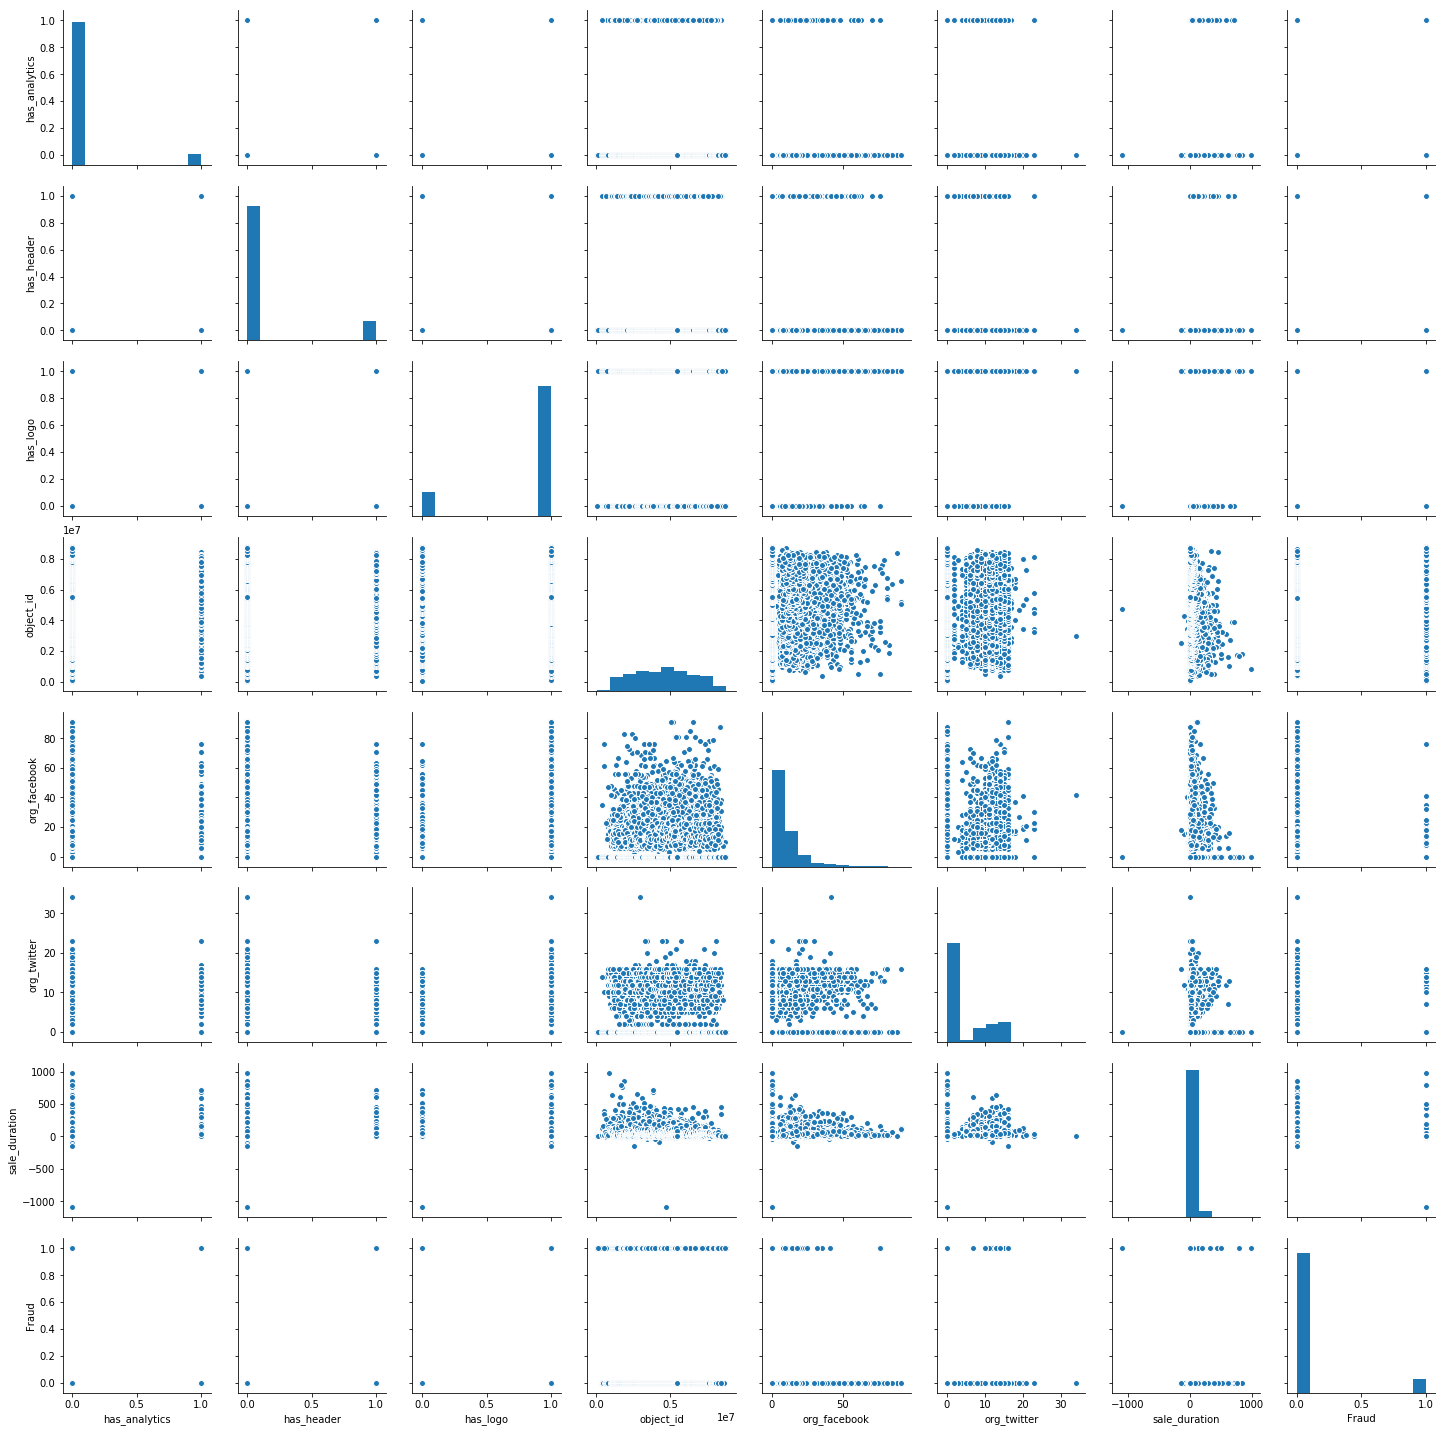

In [55]:
pairplot(X3)

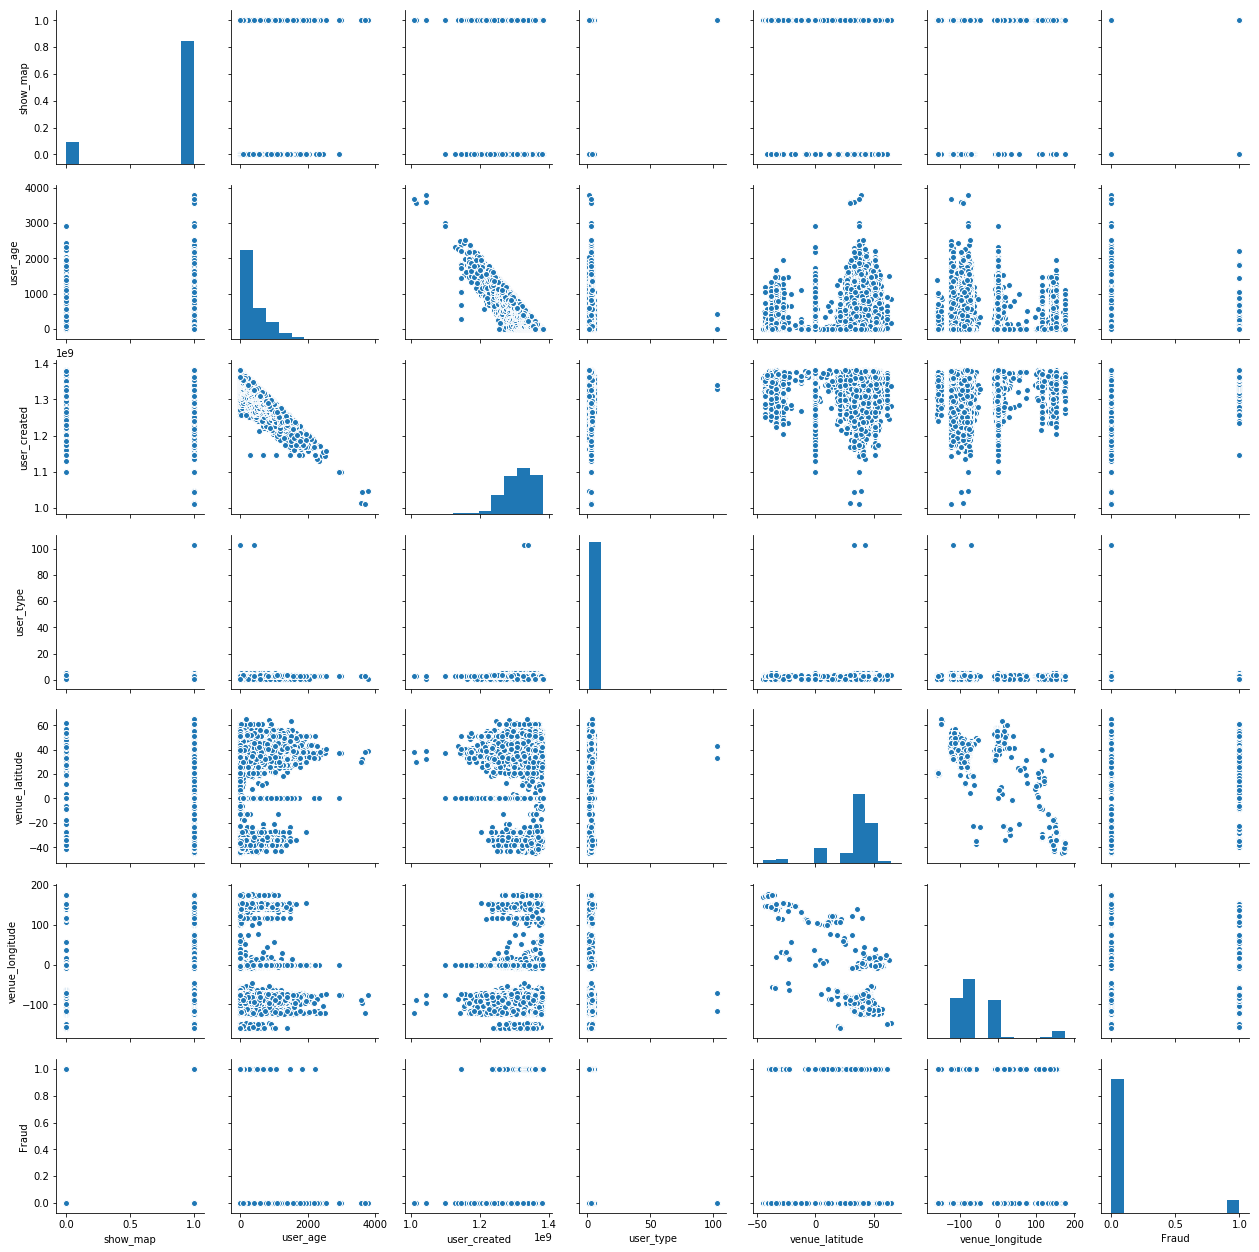

In [56]:
pairplot(X4)